In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [3]:
X,Y=make_blobs(n_samples=1000,centers=3,n_features=2)
X

array([[-3.82322854, -9.1308569 ],
       [-6.3552124 ,  8.05537311],
       [-5.3106694 ,  7.79030802],
       ...,
       [ 4.57339485, -7.51689244],
       [-5.84769857, 10.29451495],
       [ 3.64030691, -5.66761793]], shape=(1000, 2))

In [4]:
Y

array([0, 2, 2, 0, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1,
       1, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 2, 2,
       0, 1, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1,
       1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 0,
       2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 1, 2, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 2,
       1, 1, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 1, 0, 1,
       0, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 0,
       2, 2, 1, 2, 0, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2,
       1, 1, 1, 2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2,
       1, 2, 0, 1, 2, 2, 2, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0,
       2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0, 1, 0, 0,
       1, 0, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1, 1, 2, 1,

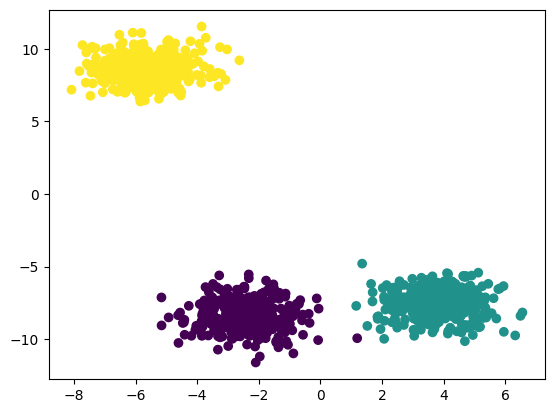

In [5]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [6]:
## Standardization _feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [8]:
x_train

array([[  1.3570602 ,  -4.79325889],
       [ -5.39259962,   8.60207606],
       [ -2.72730275,  -9.79376892],
       ...,
       [ -7.53398012,   9.97122212],
       [ -2.26608211,  -8.65071613],
       [  4.6928451 , -10.13174533]], shape=(700, 2))

In [9]:
x_train_scaled

array([[ 0.68334589, -0.31155003],
       [-0.97367236,  1.38486489],
       [-0.31935115, -0.94482571],
       ...,
       [-1.4993739 ,  1.55825658],
       [-0.20612307, -0.80006697],
       [ 1.5022696 , -0.98762779]], shape=(700, 2))

In [10]:
from sklearn.cluster import KMeans
#Elbow Method to find optimal number of clusters
wcss=[]

for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_)

In [11]:
wcss

[1400.0000000000005,
 317.4993159664749,
 49.98093428903411,
 41.161615102622704,
 33.05021061407705,
 25.081896073439353,
 22.57749613919749,
 21.123412679198065,
 19.479515373899453,
 18.436697651947416]

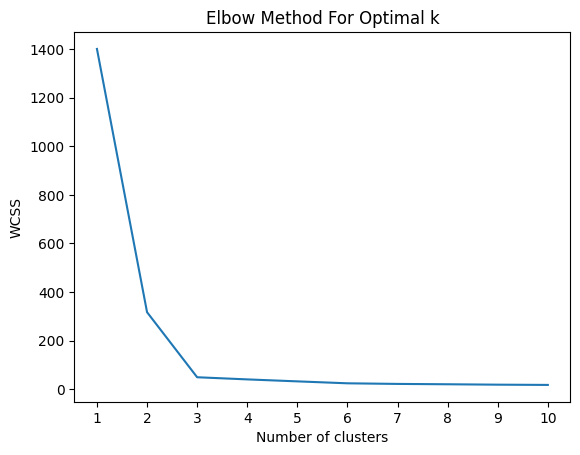

In [12]:
##Plot the elbow graph
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')   
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k') 
plt.show()

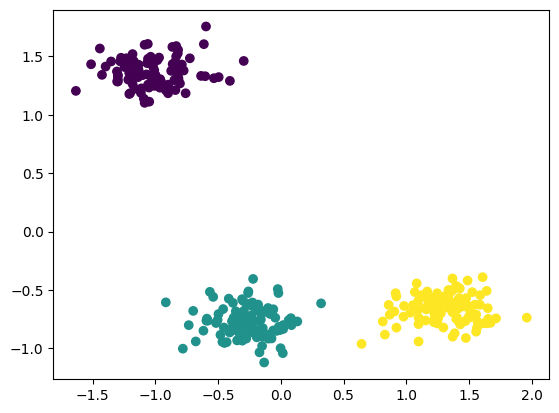

In [13]:
kmeans=KMeans(n_clusters=3,init='k-means++')
kmeans.fit(x_train_scaled)
y_pred=kmeans.predict(x_test_scaled)
plt.scatter(x_test_scaled[:,0],x_test_scaled[:,1],c=y_pred)

In [14]:
## Validating the K value
## Kneelocator
## Silhoutee scoring

#1.KneeLocator Method


In [16]:
from kneed import KneeLocator
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [18]:
print(k1.elbow)

3


In [19]:
## Silhoutee scoring method
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train_scaled)
    score=silhouette_score(x_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

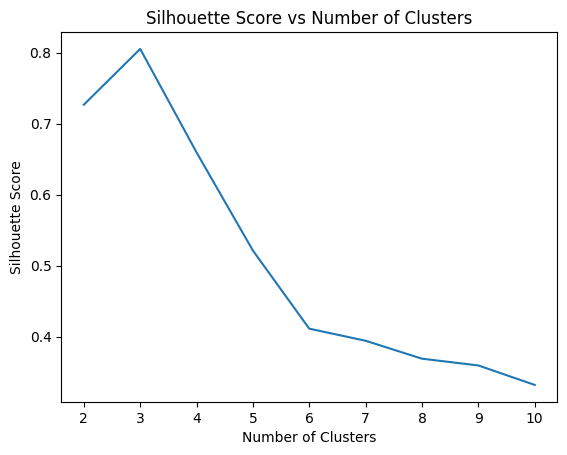

In [26]:
# Plot silhouette scores
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()